<a href="https://colab.research.google.com/github/manasviKnarula/104-project/blob/main/Confusion_Matrix_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving BankNote_Authentication.csv to BankNote_Authentication.csv


In [2]:
import pandas as pd

df = pd.read_csv('BankNote_Authentication.csv')

print (df.head())


   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [3]:
from sklearn.model_selection import train_test_split

Variance = df[['variance', 'skewness','curtosis','entropy']]
Class = df['class']

Variance_train, Variance_test, Class_train, Class_test = train_test_split(Variance, Class, test_size = 0.25, random_state = 0)

In [4]:
from sklearn.linear_model import LogisticRegression
import numpy as np

classifier = LogisticRegression(random_state = 0)
classifier.fit(Variance_train, Class_train)

LogisticRegression(random_state=0)

In [5]:
predicted_values = []
y_prediction = classifier.predict(Variance_test)
for i in y_prediction:
  if i == 0:
    predicted_values.append("Authorized")
  else:
    predicted_values.append("Forged")

                    
actual_values = []
for i in Class_test:
  if i == 0 :
    actual_values.append("Authorized")
  else:
    actual_values.append("Forged")


[Text(0, 0.5, 'Authorized'), Text(0, 1.5, 'Forged')]

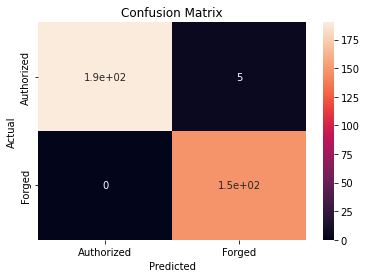

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt  

labels = ["Authorized", "Forged"]

cm = confusion_matrix(actual_values, predicted_values)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels)